### 機器學習 HW3-1
### 統計所 0852617 曾鈺評

### 1. Random Data Generator
### a. Univariate gaussian data generator

In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

In [2]:
m = int(input("mean m = "))
s = int(input("variance s = "))

mean m = 3
variance s = 5


In [3]:
def NormalGenerator(m, s):
    u = random.uniform(0,1)
    v = random.uniform(0,1)
    z = math.sqrt(-2*math.log(u)) * math.cos(2*math.pi*v)
    output = m + z*np.sqrt(s)
    return output

In [4]:
output = NormalGenerator(m, s)
print("output = %s" %output)

output = -0.7373951244316697


### b. Polynomial basis linear model data generator

In [5]:
def PolynomialLinearGenerator(n, a, w):
    w = np.array([float(i) for i in w.split(' ')])
    x = random.uniform(-1,1)
    x_polynomial = [x**i for i in range(n)]
    epsilon = NormalGenerator(0,1)*math.sqrt(a)
    #print(epsilon)
    y = sum([w_i*x_i for w_i, x_i in zip(w, x_polynomial)]) + epsilon
    return x, x_polynomial, y

In [6]:
n = int(input("n = "))
a = int(input("a = "))
w = input("w = ")
x, x_polynomial, y = PolynomialLinearGenerator(n, a, w)
print("x = %s" % x)
print("y = %s" % y)

n = 4
a = 1
w = 1 2 3 4
x = 0.04345453301085933
y = 1.830112902031409


### 2. Sequential Estimator

In [7]:
output = NormalGenerator(m, s)
Sum = output
SumSquare = output**2
n = 1
mean_previous = Sum / n
variance_previous = 0
threshold = 0.001
# mean_epsilon = abs(mean - mean_previous)
# var_epsilon = abs(variance - variance_previous)
mean_epsilon = threshold + 1 #abs(mean - mean_previous)
var_epsilon = threshold + 1 #abs(variance - variance_previous)


print("Data point source function: N(%.1f, %.1f)\n" %(m, s))
while (mean_epsilon > threshold) or (var_epsilon > threshold):
    added_data = NormalGenerator(m, s)
    n += 1
    Sum += added_data
    SumSquare += added_data**2
    mean = Sum / n
    variance = (SumSquare - Sum**2/n) / (n-1)
    
    mean_epsilon = abs(mean - mean_previous)
    var_epsilon = abs(variance - variance_previous)
#     mean_epsilon = abs(mean - m)
#     var_epsilon = abs(variance - s)
    
    print("Add data point: %s" % added_data)
    print("Mean = %s Variance = %s" % (mean, variance))
    
    mean_previous = mean
    variance_previous = variance

Data point source function: N(3.0, 5.0)

Add data point: 3.6503072165214867
Mean = 4.105009746775744 Variance = 0.41350878203925134
Add data point: 7.227118827414724
Mean = 5.145712773655404 Variance = 3.4559427614890836
Add data point: 2.3489747369637834
Mean = 4.446528264482499 Variance = 4.259397752462149
Add data point: -3.4709369999650175
Mean = 2.8630352115929956 Variance = 15.731799557093208
Add data point: 4.7740027075908555
Mean = 3.1815297942593053 Variance = 13.194072440801289
Add data point: 0.718258806009445
Mean = 2.8296339387950398 Variance = 11.861875218984899
Add data point: 2.335762852156095
Mean = 2.7679000529651714 Variance = 10.197810197550014
Add data point: 2.6245435862522943
Mean = 2.7519715566637406 Variance = 8.925367375806085
Add data point: 1.0481217695902245
Mean = 2.581586577956389 Variance = 8.22397029929646
Add data point: 7.901453211162668
Mean = 3.0652108173387775 Variance = 9.97438972346695
Add data point: 3.8316629228039916
Mean = 3.1290818261275457 

### 3. Baysian Linear regression

In [8]:
def PrintPposterior(posterior_mean, posterior_variance, n):
    print("\nPosterior mean: ")
    for i in range(n):
        print("   %s" %str(posterior_mean[i])[1:-1])
    print("\nPosterior variance: ")
    for i in range(n):
        #for j in range(n):
        print("   %s" %str(posterior_variance[i])[1:-1])
        #print("\n")

In [9]:
b = float(input("b = "))
n = int(input("n = "))
a = int(input("a = "))
w = input("w = ")

b = 1
n = 4
a = 1
w = 1 2 3 4


In [10]:
X = []
Y = []
prior_mean = np.zeros(n).reshape(-1,1)
prior_variance = np.linalg.inv(b*np.eye(n))
precision = 1/a
#print(prior_variance)
epsilon = 0.001
count = 0

while (True):
    count += 1
    x, x_polynomial, y = PolynomialLinearGenerator(n, a, w)
    X.append(x)
    Y.append(y)
    print("Add data point: (%.4f, %.4f)" %(x,y))
    design_matrix = np.array([x**i for i in range(n)]).reshape(1,-1)
    #y = np.array(y).reshape(-1,1)
    posterior_variance = np.linalg.inv(precision*design_matrix.T@design_matrix + np.linalg.inv(prior_variance)) 
    posterior_mean = posterior_variance@(np.linalg.inv(prior_variance)@prior_mean + precision*design_matrix.T*y)
    PrintPposterior(posterior_mean, posterior_variance, n)
    #print(posterior_variance)
    predictive_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    predictive_mean = design_matrix@posterior_mean
    print("\nPredictive distribution ~ N(%.5f, %.5f)" %(predictive_mean[0][0], predictive_variance[0][0]))
    print("--------------------------------------------------------")
    variance_epsilon = abs(predictive_variance[0][0] - a)
    if (count == 10):
        posterior_mean_ten = posterior_mean
        posterior_variance_ten = posterior_variance
    if (count == 50):
        posterior_mean_fifty = posterior_mean
        posterior_variance_fifty = posterior_variance
    if (variance_epsilon <= epsilon):
        break
    prior_mean = posterior_mean
    prior_variance = posterior_variance

Add data point: (0.2063, 0.4773)

Posterior mean: 
   0.23345804
   0.04815592
   0.00993323
   0.00204895

Posterior variance: 
    0.51086746 -0.10089448 -0.02081174 -0.00429288
   -1.00894485e-01  9.79188265e-01 -4.29288410e-03 -8.85502991e-04
   -2.08117354e-02 -4.29288410e-03  9.99114497e-01 -1.82654721e-04
   -4.29288410e-03 -8.85502991e-04 -1.82654721e-04  9.99962323e-01

Predictive distribution ~ N(0.24383, 1.51087)
--------------------------------------------------------
Add data point: (-0.4857, -0.3707)

Posterior mean: 
   0.06312255
   0.22521211
   -0.05659997
   0.03837564

Posterior variance: 
    0.34853693  0.0678409  -0.08421819  0.03032662
    0.0678409   0.80379532  0.06161532 -0.03687094
   -0.08421819  0.06161532  0.97434787  0.01333976
    0.03032662 -0.03687094  0.01333976  0.99257918

Predictive distribution ~ N(-0.06400, 1.47385)
--------------------------------------------------------
Add data point: (0.3401, 2.6963)

Posterior mean: 
   0.68765688
   0.8219

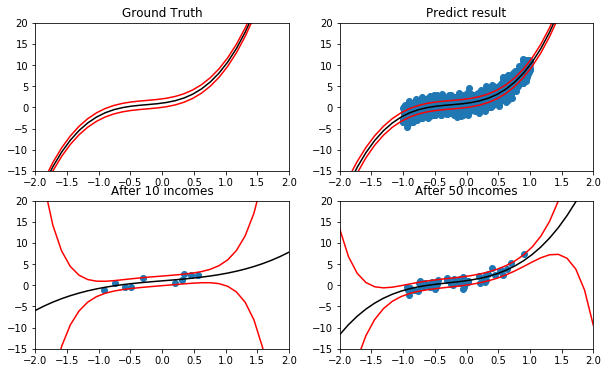

In [12]:
x = np.linspace(-2, 2, 30)
w = [float(w_i) for w_i in w.split(' ')]

fig = plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.title("Ground Truth")
plt.xlim(-2,2)
plt.ylim(-15,20)
ground_function = np.poly1d(np.flip(w))
y = ground_function(x)
y_plus = y + a
y_minus = y - a
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')

plt.subplot(2,2,2)
plt.title("Predict result")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean
    predict_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X, Y)

plt.subplot(2,2,3)
plt.title("After 10 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_ten.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_ten
    predict_variance = 1/precision + design_matrix@posterior_variance_ten@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:10], Y[:10])


plt.subplot(2,2,4)
plt.title("After 50 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_fifty.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_fifty
    predict_variance = 1/precision + design_matrix@posterior_variance_fifty@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:50], Y[:50])
plt.show()

In [13]:
b = float(input("b = "))
n = int(input("n = "))
a = int(input("a = "))
w = input("w = ")

b = 100
n = 4
a = 1
w = 1 2 3 4


In [14]:
X = []
Y = []
prior_mean = np.zeros(n).reshape(-1,1)
prior_variance = np.linalg.inv(b*np.eye(n))
precision = 1/a
#print(prior_variance)
epsilon = 0.001
count = 0

while (True):
#for i in range(100):
    count += 1
    x, x_polynomial, y = PolynomialLinearGenerator(n, a, w)
    X.append(x)
    Y.append(y)
    print("Add data point: (%.4f, %.4f)" %(x,y))
    design_matrix = np.array([x**i for i in range(n)]).reshape(1,-1)
    #y = np.array(y).reshape(-1,1)
    posterior_variance = np.linalg.inv(precision*design_matrix.T@design_matrix + np.linalg.inv(prior_variance)) 
    posterior_mean = posterior_variance@(np.linalg.inv(prior_variance)@prior_mean + precision*design_matrix.T*y)
    PrintPposterior(posterior_mean, posterior_variance, n)
    #print(posterior_variance)
    predictive_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    predictive_mean = design_matrix@posterior_mean
    print("\nPredictive distribution ~ N(%.5f, %.5f)" %(predictive_mean[0][0], predictive_variance[0][0]))
    print("--------------------------------------------------------")
    variance_epsilon = abs(predictive_variance[0][0] - a)
    if (count == 10):
        posterior_mean_ten = posterior_mean
        posterior_variance_ten = posterior_variance
    if (count == 50):
        posterior_mean_fifty = posterior_mean
        posterior_variance_fifty = posterior_variance
    if (variance_epsilon <= epsilon):
        break
    prior_mean = posterior_mean
    prior_variance = posterior_variance

Add data point: (-0.3871, 1.3460)

Posterior mean: 
   0.01330341
   -0.00514973
   0.00199345
   -0.00077166

Posterior variance: 
    9.90116200e-03  3.82600330e-05 -1.48103984e-05  5.73308185e-06
    3.82600330e-05  9.98518960e-03  5.73308185e-06 -2.21926694e-06
   -1.48103984e-05  5.73308185e-06  9.99778073e-03  8.59074730e-07
    5.73308185e-06 -2.21926694e-06  8.59074730e-07  9.99966745e-03

Predictive distribution ~ N(0.01564, 1.01162)
--------------------------------------------------------
Add data point: (-0.6260, 0.6718)

Posterior mean: 
   0.01966001
   -0.00914871
   0.0045044
   -0.00234641

Posterior variance: 
    9.80526822e-03  9.85874579e-05 -5.26897796e-05  2.94892933e-05
    9.85874579e-05  9.94723721e-03  2.95632569e-05 -1.71644603e-05
   -5.26897796e-05  2.95632569e-05  9.98281785e-03  1.02431099e-05
    2.94892933e-05 -1.71644603e-05  1.02431099e-05  9.99378222e-03

Predictive distribution ~ N(0.02773, 1.01564)
--------------------------------------------------

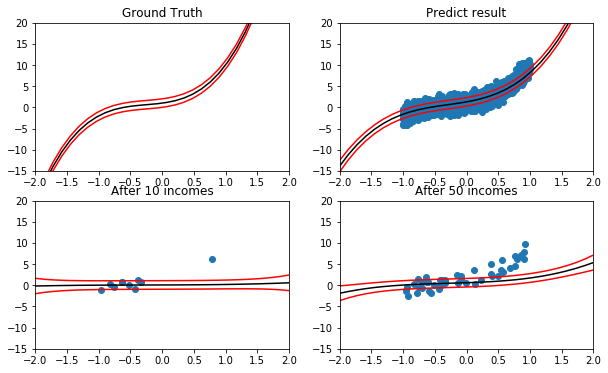

In [15]:
x = np.linspace(-2, 2, 30)
w = [float(w_i) for w_i in w.split(' ')]

fig = plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.title("Ground Truth")
plt.xlim(-2,2)
plt.ylim(-15,20)
ground_function = np.poly1d(np.flip(w))
y = ground_function(x)
y_plus = y + a
y_minus = y - a
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')

plt.subplot(2,2,2)
plt.title("Predict result")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean
    predict_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X, Y)

plt.subplot(2,2,3)
plt.title("After 10 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_ten.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_ten
    predict_variance = 1/precision + design_matrix@posterior_variance_ten@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:10], Y[:10])


plt.subplot(2,2,4)
plt.title("After 50 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_fifty.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_fifty
    predict_variance = 1/precision + design_matrix@posterior_variance_fifty@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:50], Y[:50])
plt.show()

In [16]:
b = float(input("b = "))
n = int(input("n = "))
a = int(input("a = "))
w = input("w = ")

b = 1
n = 3
a = 3
w = 1 2 3


In [17]:
X = []
Y = []
prior_mean = np.zeros(n).reshape(-1,1)
prior_variance = np.linalg.inv(b*np.eye(n))
precision = 1/a
#print(prior_variance)
epsilon = 0.001
count = 0

while (True):
#for i in range(100):
    count += 1
    x, x_polynomial, y = PolynomialLinearGenerator(n, a, w)
    X.append(x)
    Y.append(y)
    print("Add data point: (%.4f, %.4f)" %(x,y))
    design_matrix = np.array([x**i for i in range(n)]).reshape(1,-1)
    #y = np.array(y).reshape(-1,1)
    posterior_variance = np.linalg.inv(precision*design_matrix.T@design_matrix + np.linalg.inv(prior_variance)) 
    posterior_mean = posterior_variance@(np.linalg.inv(prior_variance)@prior_mean + precision*design_matrix.T*y)
    PrintPposterior(posterior_mean, posterior_variance, n)
    #print(posterior_variance)
    predictive_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    predictive_mean = design_matrix@posterior_mean
    print("\nPredictive distribution ~ N(%.5f, %.5f)" %(predictive_mean[0][0], predictive_variance[0][0]))
    print("--------------------------------------------------------")
    variance_epsilon = abs(predictive_variance[0][0] - a)
    if (count == 10):
        posterior_mean_ten = posterior_mean
        posterior_variance_ten = posterior_variance
    if (count == 50):
        posterior_mean_fifty = posterior_mean
        posterior_variance_fifty = posterior_variance
    if (variance_epsilon <= epsilon):
        break
    prior_mean = posterior_mean
    prior_variance = posterior_variance

Add data point: (0.0564, -1.1755)

Posterior mean: 
   -0.29363489
   -0.01656249
   -0.00093421

Posterior variance: 
    0.75019932 -0.01409002 -0.00079475
   -1.40900225e-02  9.99205251e-01 -4.48278408e-05
   -7.94748566e-04 -4.48278408e-05  9.99997471e-01

Predictive distribution ~ N(-0.29457, 3.75179)
--------------------------------------------------------
Add data point: (-0.3680, -0.8270)

Posterior mean: 
   -0.3977119
   0.0360462
   -0.01948553

Posterior variance: 
    0.60445476  0.05958074 -0.02677316
   0.05958074 0.96196626 0.0130867 
   -0.02677316  0.0130867   0.99536692

Predictive distribution ~ N(-0.41361, 3.70056)
--------------------------------------------------------
Add data point: (0.4664, 4.4698)

Posterior mean: 
   0.38061803
   0.67109205
   0.22387619

Posterior variance: 
    0.50402981 -0.02235681 -0.05817319
   -0.02235681  0.89511273 -0.01253285
   -0.05817319 -0.01253285  0.98554902

Predictive distribution ~ N(0.74233, 3.69669)
--------------------

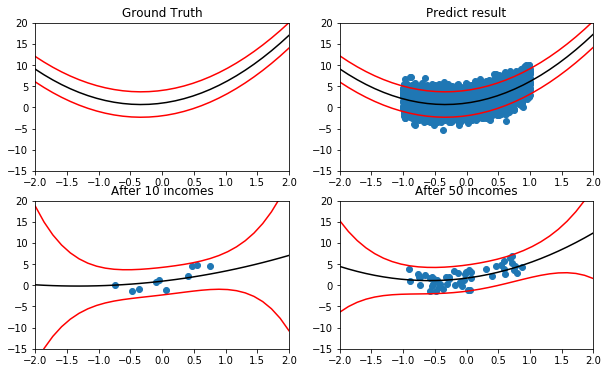

In [18]:
x = np.linspace(-2, 2, 30)
w = [float(w_i) for w_i in w.split(' ')]

fig = plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.title("Ground Truth")
plt.xlim(-2,2)
plt.ylim(-15,20)
ground_function = np.poly1d(np.flip(w))
y = ground_function(x)
y_plus = y + a
y_minus = y - a
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')

plt.subplot(2,2,2)
plt.title("Predict result")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean
    predict_variance = 1/precision + design_matrix@posterior_variance@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X, Y)

plt.subplot(2,2,3)
plt.title("After 10 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_ten.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_ten
    predict_variance = 1/precision + design_matrix@posterior_variance_ten@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:10], Y[:10])


plt.subplot(2,2,4)
plt.title("After 50 incomes")
plt.xlim(-2,2)
plt.ylim(-15,20)
predict_function = np.poly1d(np.flip(posterior_mean_fifty.flatten()))
for j in range(len(x)):
    design_matrix = np.array([x[j]**i for i in range(n)]).reshape(1,-1)
    y[j] = design_matrix@posterior_mean_fifty
    predict_variance = 1/precision + design_matrix@posterior_variance_fifty@design_matrix.T
    y_plus[j] = y[j] + predict_variance
    y_minus[j] = y[j] - predict_variance
plt.plot(x, y, color='black')
plt.plot(x, y_plus, color='red')
plt.plot(x, y_minus, color='red')
plt.scatter(X[:50], Y[:50])
plt.show()